### 1. Imports

In [34]:
import sdv
import pandas as pd

In [35]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [36]:
NUM_ROWS = 500
NUM_EPOCHS = 1000

### 2. Load data

In [37]:
df = pd.read_excel(
    io='../../data/real/TLP_Identia.xlsx'
    )

In [38]:
df.head()

ISC.FPacientes.IDUsuario ISC.FPacientes.etiquetaDiagnosticaExpTLP  \
0         M_Rango3_056_ED2                                      ED2   
1         M_Rango3_312_ED3                                      ED3   
2         M_Rango2_220_ED1                                      ED1   
3         M_Rango1_122_ED1                                      ED2   
4         M_Rango1_233_ED2                                      ED2   

  ED_2Clases ISC.FPacientes.etiquetaDiagnostica ED_MMSE_2Clases  \
0          D                                ED2               D   
1          D                                ED3               D   
2          H                                ED1               H   
3          D                                ED1               H   
4          D                                ED2               D   

   ISC.FPacientes.genero  ISC.FPacientes.Edad  ISC.resultadosCovid.numDosis  \
0                      2                   82                             4   
1                      2                   75                             4   
2                      2                   72                             3   
3                      2                   60                             3   
4                      2                   64                             3   

   ISC.resultadosCovid.numVecesCovid  ISC.resultadosCovid.numVecesCovid_mode  \
0                                0.0                                       0   
1                                1.0                                       1   
2                                0.0                                       0   
3                                0.0                                       0   
4                                2.0                                       2   

   ISC.resultadosCovid.pasadoCovid  ISC.resultadosCovid.sentimientoAislado  \
0                                0                                     4.0   
1                                1                                     4.0   
2                                0                                     3.0   
3                                0                                     3.0   
4                                1                                     3.0   

   ISC.resultadosCovid.sentimientoAislado_mediaFiltro  \
0                                                   4   
1                                                   4   
2                                                   3   
3                                                   3   
4                                                   3   

   ISC.resultadosCovid.sentimientoAislado_mode  \
0                                            4   
1                                            4   
2                                            3   
3                                            3   
4                                            3   

   ISC.resultadosCovid.sintomaCansancio  ISC.resultadosCovid.sintomaDiarrea  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     0                                   0   
4                                     1                                   0   

   ISC.resultadosCovid.sintomaDifRespirar  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   ISC.resultadosCovid.sintomaDolCabeza  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   ISC.resultadosCovid.sintomaDolGarganta  \
0                                       0   
1       

### 3. Preprocesing

In [39]:
drop_columns = [
    'ISC.FPacientes.IDUsuario',
    'ISC.FPacientes.etiquetaDiagnosticaExpTLP',
    'ED_MMSE_2Clases',
    'ISC.resultadosWFQ.DE_array',
    'ISC.resultadosWFQ.NO_array',
    'ISC.resultadosWFQ.SA_array'
]

In [40]:
df.drop(columns=drop_columns, inplace=True)

In [41]:
categorical_columns = [
    'ED_2Clases',
    'ISC.FPacientes.etiquetaDiagnostica',
    'ISC.resultadosCovid.sintomaOtroString'
]

In [42]:
df[categorical_columns] = df[categorical_columns].astype('category')

In [43]:
df.dtypes

ED_2Clases                                                            category
ISC.FPacientes.etiquetaDiagnostica                                    category
ISC.FPacientes.genero                                                    int64
ISC.FPacientes.Edad                                                      int64
ISC.resultadosCovid.numDosis                                             int64
ISC.resultadosCovid.numVecesCovid                                      float64
ISC.resultadosCovid.numVecesCovid_mode                                   int64
ISC.resultadosCovid.pasadoCovid                                          int64
ISC.resultadosCovid.sentimientoAislado                                 float64
ISC.resultadosCovid.sentimientoAislado_mediaFiltro                       int64
ISC.resultadosCovid.sentimientoAislado_mode                              int64
ISC.resultadosCovid.sintomaCansancio                                     int64
ISC.resultadosCovid.sintomaDiarrea                  

In [44]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=df, table_name='TLP')

Auto detected data:



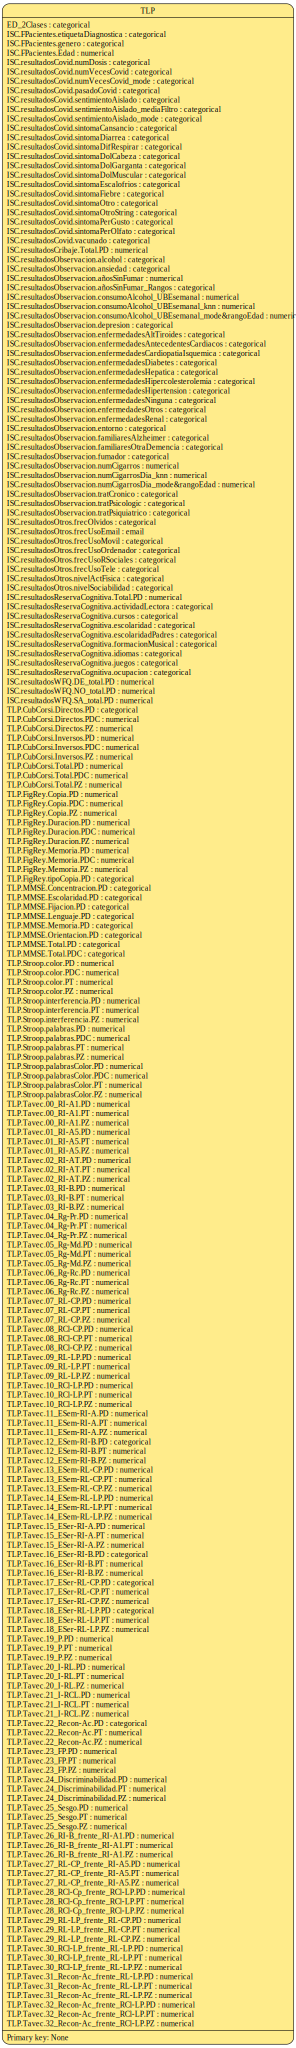

In [45]:
print('Auto detected data:\n')
metadata.visualize()

In [9]:
#metadata.update_column(
#    column_name='age',
#    sdtype='numerical',
#    table_name='strokes',
#    computer_representation='Int8')

In [10]:
metadata.validate()

In [11]:
metadata.validate_table(data=df, table_name='TLP')

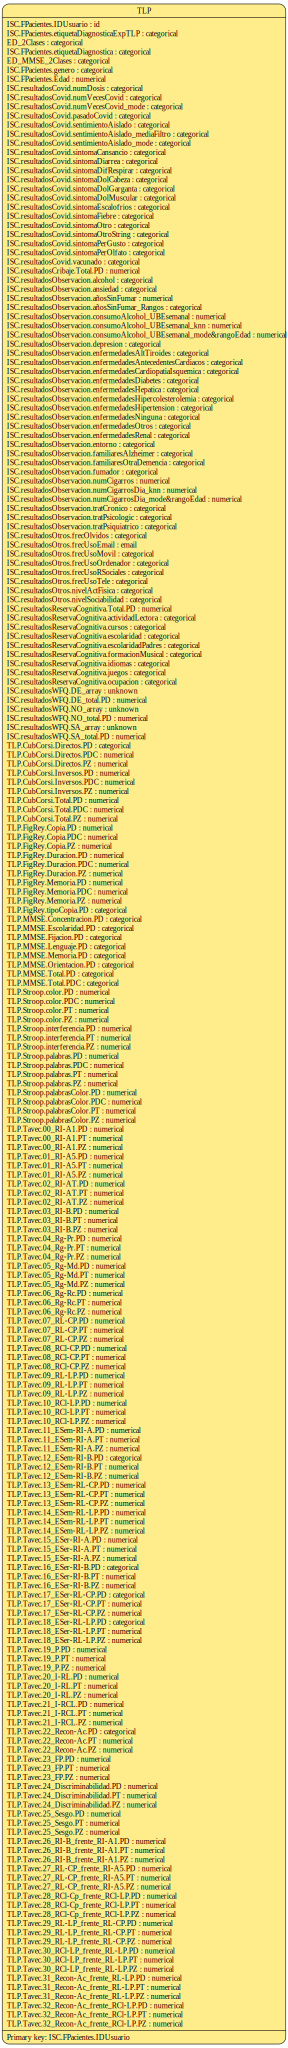

In [12]:
metadata.visualize()

In [13]:
import os
if os.path.exists("metadata.json"):
  os.remove("metadata.json")

metadata.save_to_json('metadata.json')
# in the future, you can reload the metadata object from the file
metadata = Metadata.load_from_json('metadata.json')

### 4. Synthesizers

#### 4.1. GaussianCopulaSynthesizer

In [14]:
from sdv.single_table import GaussianCopulaSynthesizer

gc_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    locales=["es_ES"],
    numerical_distributions={},
    default_distribution='beta'
)

In [15]:
gc_synthesizer.fit(df)

c:\Users\jgala\uned\tfm\synthetic-data\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [16]:
samples = gc_synthesizer.sample(num_rows=5)

In [17]:
samples

ISC.FPacientes.IDUsuario ISC.FPacientes.etiquetaDiagnosticaExpTLP  \
0            sdv-id-DdWYMQ                                      ED1   
1            sdv-id-VufBUs                                      ED2   
2            sdv-id-lMtAUK                                      ED1   
3            sdv-id-xawrXm                                      ED1   
4            sdv-id-rrDryr                                      ED2   

  ED_2Clases ISC.FPacientes.etiquetaDiagnostica ED_MMSE_2Clases  \
0          H                                ED1               H   
1          D                                ED1               D   
2          D                                ED2               D   
3          H                                ED3               H   
4          D                                ED2               H   

   ISC.FPacientes.genero  ISC.FPacientes.Edad  ISC.resultadosCovid.numDosis  \
0                      2                   71                             4   
1                      2                   78                             3   
2                      1                   64                             0   
3                      2                   73                             4   
4                      2                   70                             4   

   ISC.resultadosCovid.numVecesCovid  ISC.resultadosCovid.numVecesCovid_mode  \
0                                0.0                                       0   
1                                0.0                                       0   
2                                0.0                                       0   
3                                0.0                                       0   
4                                1.0                                       1   

   ...  TLP.Tavec.29_RL-LP_frente_RL-CP.PZ  \
0  ...                                 NaN   
1  ...                                 NaN   
2  ...                                 NaN   
3  ...                                 NaN   
4  ...                                 NaN   

   TLP.Tavec.30_RCl-LP_frente_RL-LP.PD  TLP.Tavec.30_RCl-LP_frente_RL-LP.PT  \
0                           -24.561683                                   -1   
1                           -17.642044                                    0   
2                             3.149819                                    1   
3                            -1.946547                                    0   
4                             6.332351                                    1   

   TLP.Tavec.30_RCl-LP_frente_RL-LP.PZ  TLP.Tavec.31_Recon-Ac_frente_RL-LP.PD  \
0                            -0.898119                             -14.168561   
1                            -0.204152                             -63.676371   
2                             0.739091                             -38.951836   
3                             0.271091                              -8.980816   
4                             0.418616                               1.195818   

   TLP.Tavec.31_Recon-Ac_frente_RL-LP.PT  \
0                                      1   
1                                     -1   
2                                     -1   
3                                      1   
4                                      1   

   TLP.Tavec.31_Recon-Ac_frente_RL-LP.PZ  \
0                               0.711318   
1                              -1.435665   
2                              -0.579286   
3                               0.828914   
4                               1.298958   

   TLP.Tavec.32_Recon-Ac_frente_RCl-LP.PD  \
0                               -6.139689   
1                              -55.399118   
2                              -44.065596   
3                               -9.751086   
4                                6.023743   

   TLP.Tavec.32_Recon-Ac_frente_RCl-LP.PT  \
0                                       1   
1                                      -1   
2                                      -1

In [16]:
num_no_strokes, num_strokes = df['stroke'].value_counts()
num_synthetic_data = num_no_strokes - num_strokes

In [17]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = gc_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['stroke'] == 1].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [18]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [19]:
gc_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [20]:
gc_synthetic_data.shape

(9722, 11)

In [21]:
gc_synthetic_data.to_csv(
    '../../data/strokes/stroke-gc.csv',
    index=False
)

#### 4.2.CTGANSynthesizer

In [22]:
from sdv.single_table import CTGANSynthesizer

ctgan_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    locales=['es_ES'],
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [23]:
ctgan_synthesizer.fit(df)

Gen. (-1.49) | Discrim. (0.09): 100%|██████████| 1000/1000 [06:42<00:00,  2.48it/s]


In [24]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = ctgan_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['stroke'] == 1].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [25]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [26]:
ctgan_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [27]:
ctgan_synthetic_data.shape

(9722, 11)

In [28]:
ctgan_synthetic_data.to_csv(
    '../../data/strokes/stroke-ctgan.csv',
    index=False
)

#### 4.3. TVAESynthesizer

In [29]:
from sdv.single_table import TVAESynthesizer

tvaes_synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=False,
    enforce_rounding=True,
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [30]:
tvaes_synthesizer.fit(df)

Loss: 1.685: 100%|██████████| 1000/1000 [02:31<00:00,  6.60it/s]


In [31]:
synthetic_data_list = list()
while len(synthetic_data_list) < num_synthetic_data:
    samples = tvaes_synthesizer.sample(num_rows=NUM_ROWS)
    for sample in samples[samples['stroke'] == 1].values:
        synthetic_data_list.append(sample.tolist())
        if len(synthetic_data_list) == num_synthetic_data:
            break

In [32]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [33]:
tvaes_synthetic_data = pd.concat([df, synthetic_data_df], ignore_index=True)

In [34]:
tvaes_synthetic_data.shape

(9722, 11)

In [35]:
tvaes_synthetic_data.to_csv(
    '../../data/strokes/stroke-tvaes.csv',
    index=False
)

### 5. Evaluating Real vs. Synthetic Data

#### 5.1. GaussianCopulaSynthesizer

In [36]:
from sdv.evaluation.single_table import run_diagnostic

gc_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=gc_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 532.25it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [37]:
from sdv.evaluation.single_table import evaluate_quality

gc_quality_report = evaluate_quality(
    df,
    gc_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 58.90it/s]|
Column Shapes Score: 93.39%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 161.87it/s]|
Column Pair Trends Score: 87.48%

Overall Score (Average): 90.44%



In [38]:
gc_details = gc_quality_report.get_details('Column Pair Trends')
gc_details[gc_details['Real Correlation'].notnull()]

Column 1           Column 2                 Metric     Score  \
15                age  avg_glucose_level  CorrelationSimilarity  0.986031   
16                age                bmi  CorrelationSimilarity  0.997091   
49  avg_glucose_level                bmi  CorrelationSimilarity  0.988714   

    Real Correlation  Synthetic Correlation  
15          0.238060               0.210123  
16          0.333738               0.339555  
49          0.175502               0.152930

In [39]:
gc_quality_report.get_details('Column Shapes')

Column        Metric     Score
0              gender  TVComplement  0.998023
1                 age  KSComplement  0.939508
2        hypertension  TVComplement  0.990688
3       heart_disease  TVComplement  0.991165
4        ever_married  TVComplement  0.980995
5           work_type  TVComplement  0.992485
6      Residence_type  TVComplement  0.990229
7   avg_glucose_level  KSComplement  0.872274
8                 bmi  KSComplement  0.986238
9      smoking_status  TVComplement  0.982963
10             stroke  TVComplement  0.548728

In [40]:
from sdv.evaluation.single_table import get_column_plot

plot_columns = list(df.columns)
for column in plot_columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=gc_synthetic_data,
        column_name=column,
        metadata=metadata
    )
    fig.show()

#### 5.2. CTGANSynthesizer

In [41]:
ctgan_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=ctgan_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 979.60it/s]|
Data Validity Score: 99.74%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.87%



In [42]:
ctgan_quality_report = evaluate_quality(
    df,
    ctgan_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 24.89it/s]|
Column Shapes Score: 87.91%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 173.22it/s]|
Column Pair Trends Score: 81.68%

Overall Score (Average): 84.79%



In [43]:
ctgan_details = ctgan_quality_report.get_details('Column Pair Trends')
ctgan_details[ctgan_details['Real Correlation'].notnull()]

Column 1           Column 2                 Metric     Score  \
15                age  avg_glucose_level  CorrelationSimilarity  0.987435   
16                age                bmi  CorrelationSimilarity  0.953661   
49  avg_glucose_level                bmi  CorrelationSimilarity  0.994268   

    Real Correlation  Synthetic Correlation  
15          0.238060               0.263191  
16          0.333738               0.241060  
49          0.175502               0.164038

In [44]:
ctgan_quality_report.get_details('Column Shapes')

Column        Metric     Score
0              gender  TVComplement  0.922868
1                 age  KSComplement  0.800629
2        hypertension  TVComplement  0.880217
3       heart_disease  TVComplement  0.905791
4        ever_married  TVComplement  0.884410
5           work_type  TVComplement  0.933955
6      Residence_type  TVComplement  0.984776
7   avg_glucose_level  KSComplement  0.924713
8                 bmi  KSComplement  0.904924
9      smoking_status  TVComplement  0.979194
10             stroke  TVComplement  0.548728

In [45]:
for column in plot_columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=ctgan_synthetic_data,
        column_name=column,
        metadata=metadata
    )
    fig.show()

#### 5.3. TVAESSynthesizer

In [46]:
tvaes_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=tvaes_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 841.45it/s]|
Data Validity Score: 99.98%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 239.13it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.99%



In [47]:
tvaes_quality_report = evaluate_quality(
    df,
    tvaes_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 14.99it/s]|
Column Shapes Score: 82.46%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 152.74it/s]|
Column Pair Trends Score: 74.92%

Overall Score (Average): 78.69%



In [48]:
tvaes_details = tvaes_quality_report.get_details('Column Pair Trends')
tvaes_details[tvaes_details['Real Correlation'].notnull()]

Column 1           Column 2                 Metric     Score  \
15                age  avg_glucose_level  CorrelationSimilarity  0.981521   
16                age                bmi  CorrelationSimilarity  0.948817   
49  avg_glucose_level                bmi  CorrelationSimilarity  0.981726   

    Real Correlation  Synthetic Correlation  
15          0.238060               0.275018  
16          0.333738               0.231371  
49          0.175502               0.138955

In [49]:
tvaes_quality_report.get_details('Column Shapes')

Column        Metric     Score
0              gender  TVComplement  0.990730
1                 age  KSComplement  0.747853
2        hypertension  TVComplement  0.833107
3       heart_disease  TVComplement  0.692049
4        ever_married  TVComplement  0.843883
5           work_type  TVComplement  0.802323
6      Residence_type  TVComplement  0.974697
7   avg_glucose_level  KSComplement  0.853739
8                 bmi  KSComplement  0.888392
9      smoking_status  TVComplement  0.895635
10             stroke  TVComplement  0.548728

In [50]:
for column in plot_columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=tvaes_synthetic_data,
        column_name=column,
        metadata=metadata
    )
    fig.show()